In [2]:
# ライブラリの準備
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# テストデータを使ってヒートマップを書いてみる。

In [13]:
# テストデータの準備
iris = sns.load_dataset('iris')

# データの整形
iris = iris.set_index('species').T
iris.head()

species,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
sepal_length,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal_width,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal_length,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal_width,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8


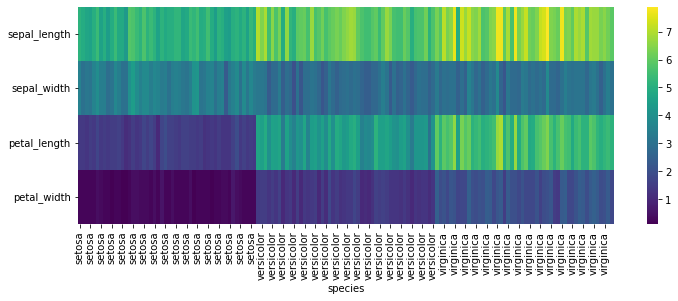

In [21]:
# ヒートマップ
fig = plt.figure(figsize = (12, 4))
ax = fig.add_subplot(111)

ax = sns.heatmap(iris, cmap = 'viridis')